In [1]:
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [2]:
## import python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## import data csv file
df=pd.read_csv('/content/drive/MyDrive/Diwali Sales Data.csv',encoding= 'unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df[['Amount','Product_Category']].groupby(['Amount','Product_Category']).size().reset_index()

,Amount,Product_Category,0
0,188.0,Office,1
1,206.0,Office,1
2,213.0,Office,1
3,367.0,Veterinary,1
4,370.0,Office,1
...,...,...,...
7390,23877.0,Auto,2
7391,23912.0,Auto,1
7392,23924.0,Auto,1
7393,23934.0,Auto,1


In [5]:
# describe() method returns description of the data in the DataFrame (i.e. count, mean, std, etc)
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [6]:
# use describe() for specific columns
df[['Age','Orders','Amount']].describe()

,Age,Orders,Amount
count,11251.000000,11251.000000,11239.000000
mean,35.421207,2.489290,9453.610858
std,12.754122,1.115047,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,1.500000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [7]:
cor=df[['Age','Orders','Amount']].corr()
cor

,Age,Orders,Amount
Age,1.000000,0.007608,0.030941
Orders,0.007608,1.000000,-0.013183
Amount,0.030941,-0.013183,1.000000


<Axes: >

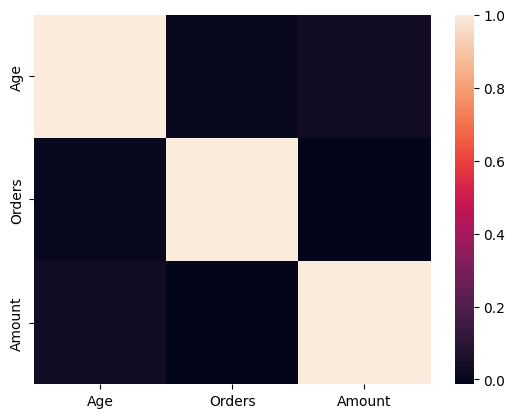

In [8]:
sns.heatmap(cor)

In [9]:
#check for null values
df.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [10]:
df.shape

(11251, 15)

In [11]:
## All the values in status and unnamed1 column are NA.So we need to drop the columns.
df.drop(['Status','unnamed1'],axis=1,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [13]:
# drop null values
df.dropna(inplace=True)

In [14]:
# change data type
df['Amount']=df['Amount'].astype(int)

In [15]:
## data is clean now,no null values prsent
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

### **EXPLORATORY DATA ANALYSIS**

**Gender**

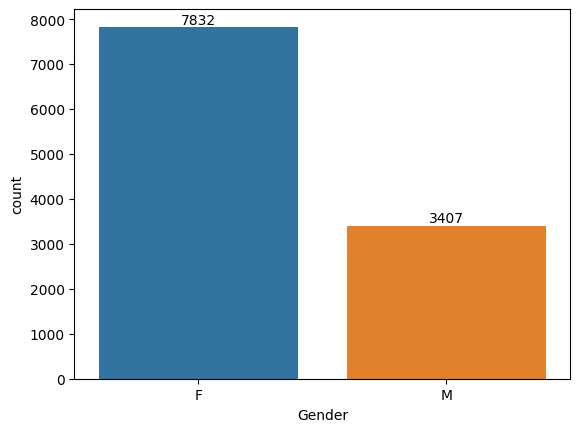

In [16]:
# plotting a count chart for Gender and it's count
gender_count=sns.countplot(x='Gender',data=df)

for bars in gender_count.containers:
  gender_count.bar_label(bars)

From above graphs we can see that most of the buyers are females.

# **Age**

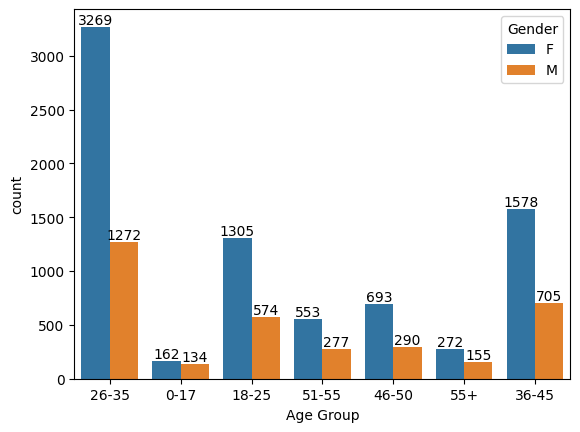

In [17]:
ag=sns.countplot(x='Age Group',data=df,hue='Gender')

for bars in ag.containers:
  ag.bar_label(bars)

In [18]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
sales_age

,Age Group,Amount
2,26-35,42613442
3,36-45,22144994
1,18-25,17240732
4,46-50,9207844
5,51-55,8261477
6,55+,4080987
0,0-17,2699653


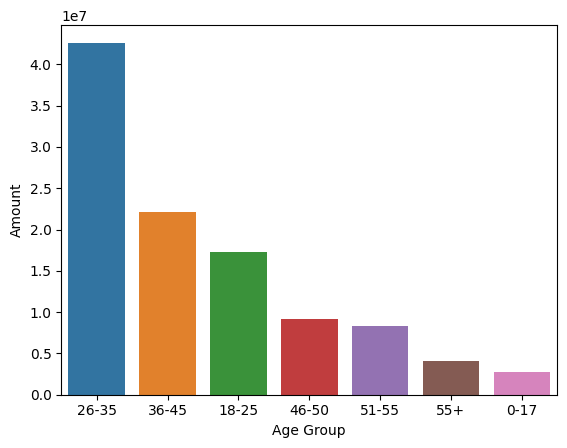

In [19]:
aa=sns.barplot(x='Age Group',y='Amount',data=sales_age)


From above graphs we can see that most of the buyers are of age group between 26-35 yrs female.

# **Product Category**

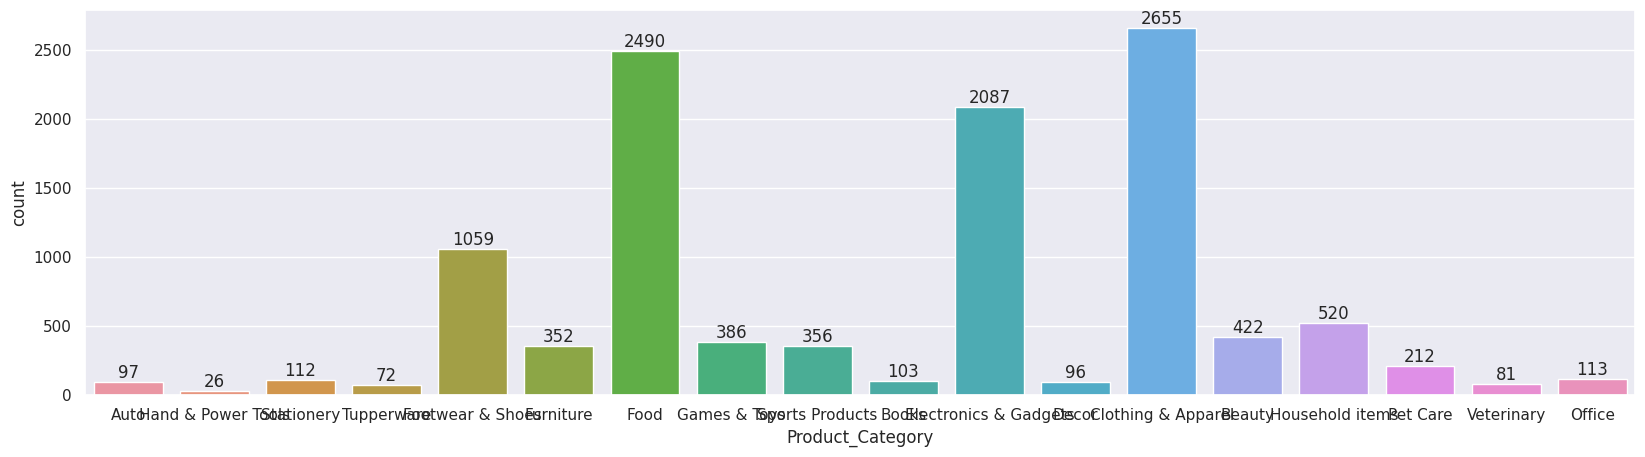

In [30]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,5)
product_amount=sns.countplot(x='Product_Category',data=df)

for bars in product_amount.containers:
  product_amount.bar_label(bars)



<Axes: xlabel='Product_Category', ylabel='Amount'>

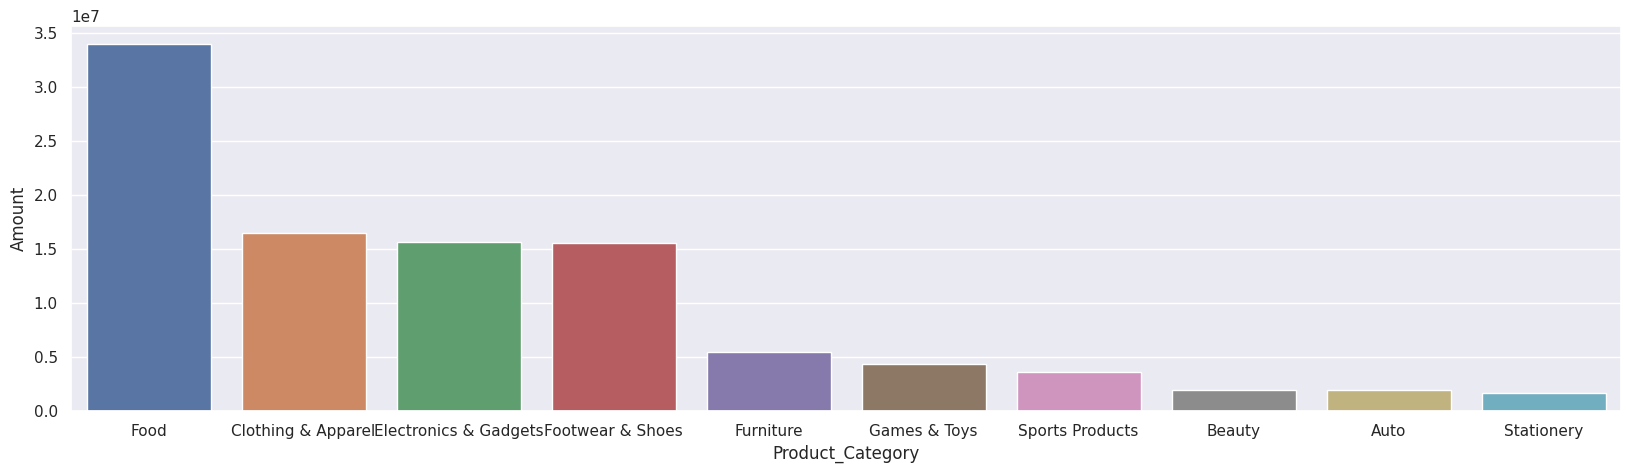

In [29]:
sales_state = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Product_Category',y= 'Amount')

From above graphs we can see that most of the sold products are from Food, Clothing and Electronics category.

In [21]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# **State**

In [25]:
sales_state = df.groupby(['State'], as_index=False)['Orders','Amount'].sum().sort_values(by='Orders', ascending=False).head(10)
sales_state

<ipython-input-25-e1ae3157bd59>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sales_state = df.groupby(['State'], as_index=False)['Orders','Amount'].sum().sort_values(by='Orders', ascending=False).head(10)


,State,Orders,Amount
14,Uttar Pradesh,4807,19374968
10,Maharashtra,3810,14427543
7,Karnataka,3240,13523540
2,Delhi,2740,11603818
9,Madhya Pradesh,2252,8101142
0,Andhra Pradesh,2051,8037146
5,Himachal Pradesh,1568,4963368
8,Kerala,1137,3894491
4,Haryana,1109,4220175
3,Gujarat,1066,3946082


<Axes: xlabel='State', ylabel='Orders'>

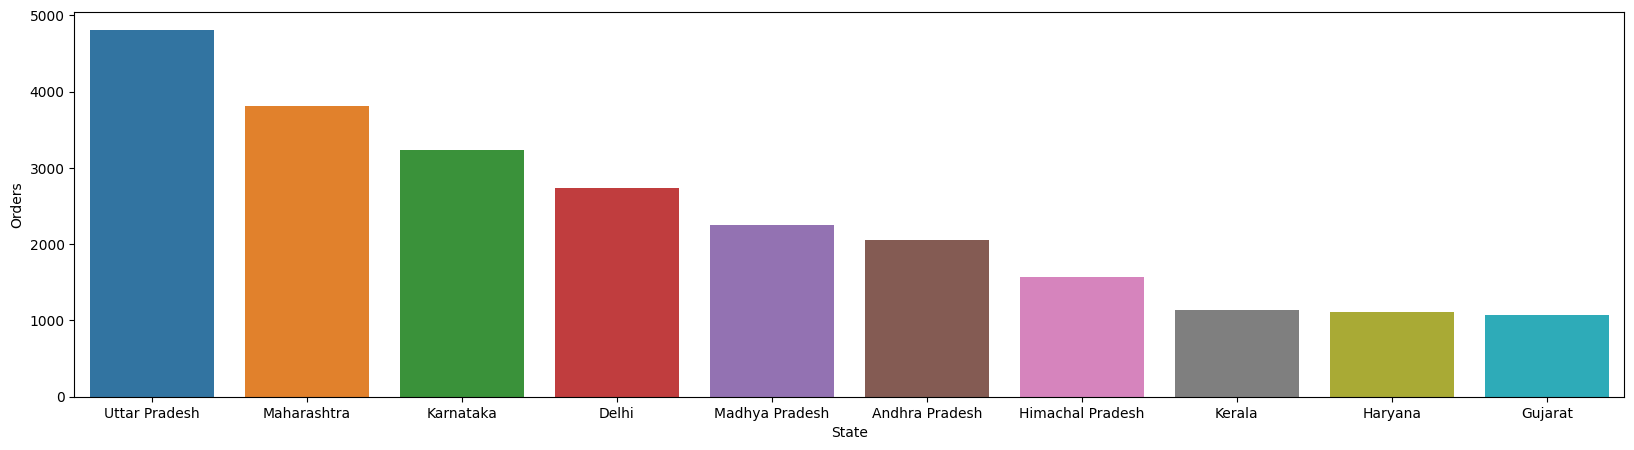

In [23]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,5)
sns.barplot(x='State',y='Orders',data=sales_state)

<Axes: xlabel='State', ylabel='Amount'>

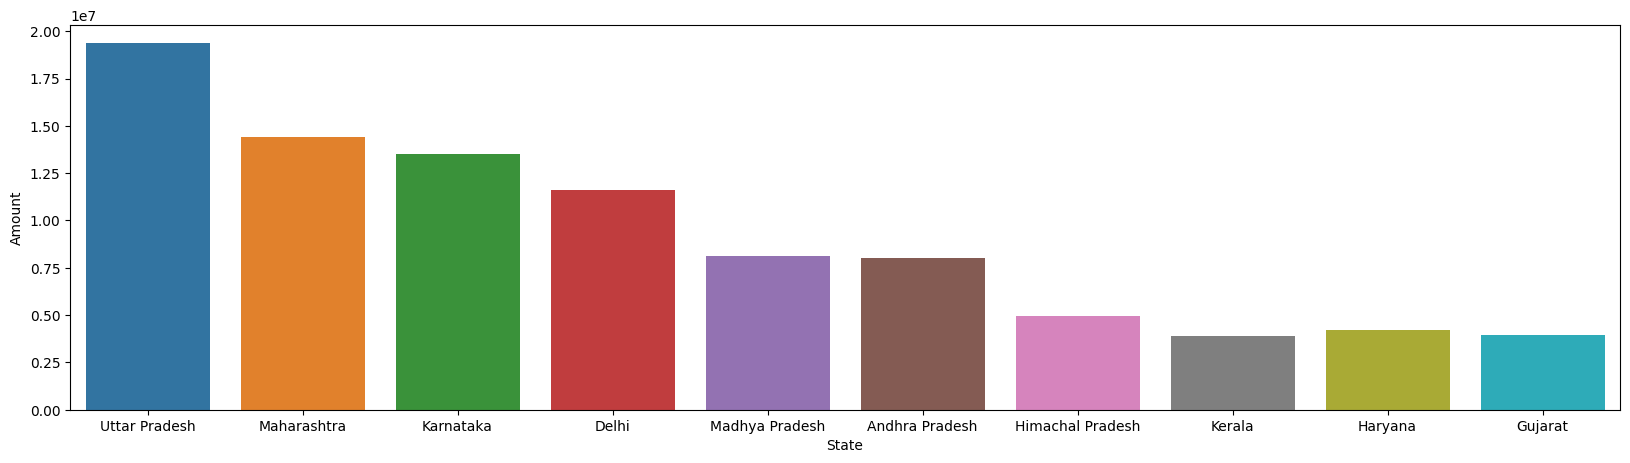

In [26]:
matplotlib.rcParams['figure.figsize']=(20,5)
sns.barplot(x='State',y='Amount',data=sales_state)

From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively.

# **Occupation**

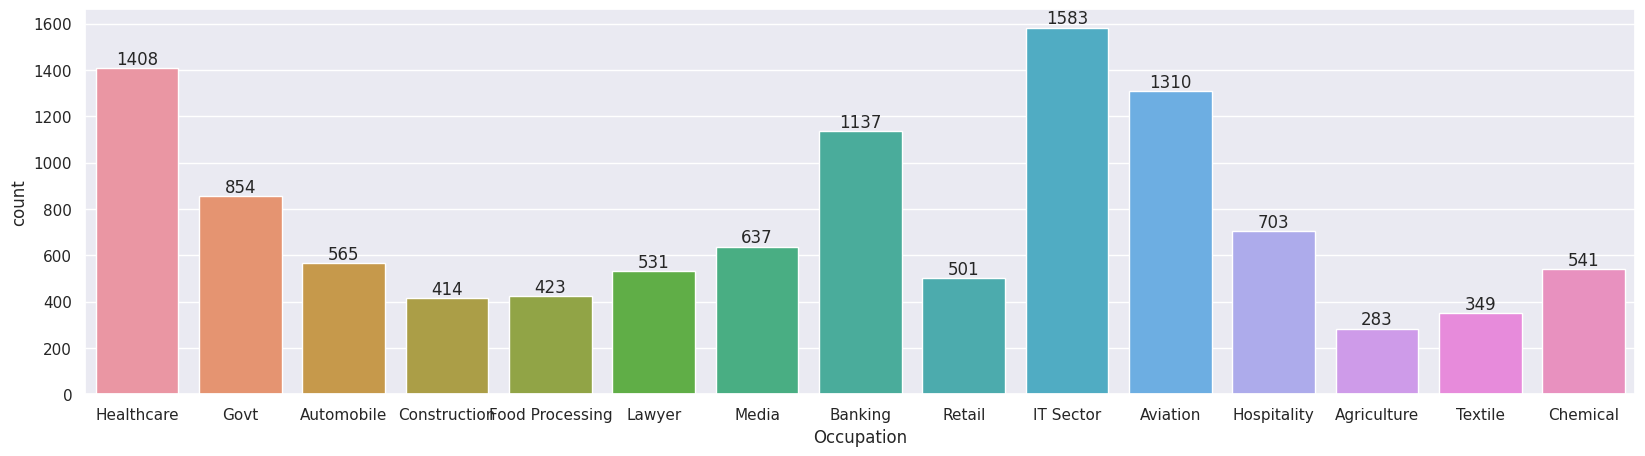

In [27]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

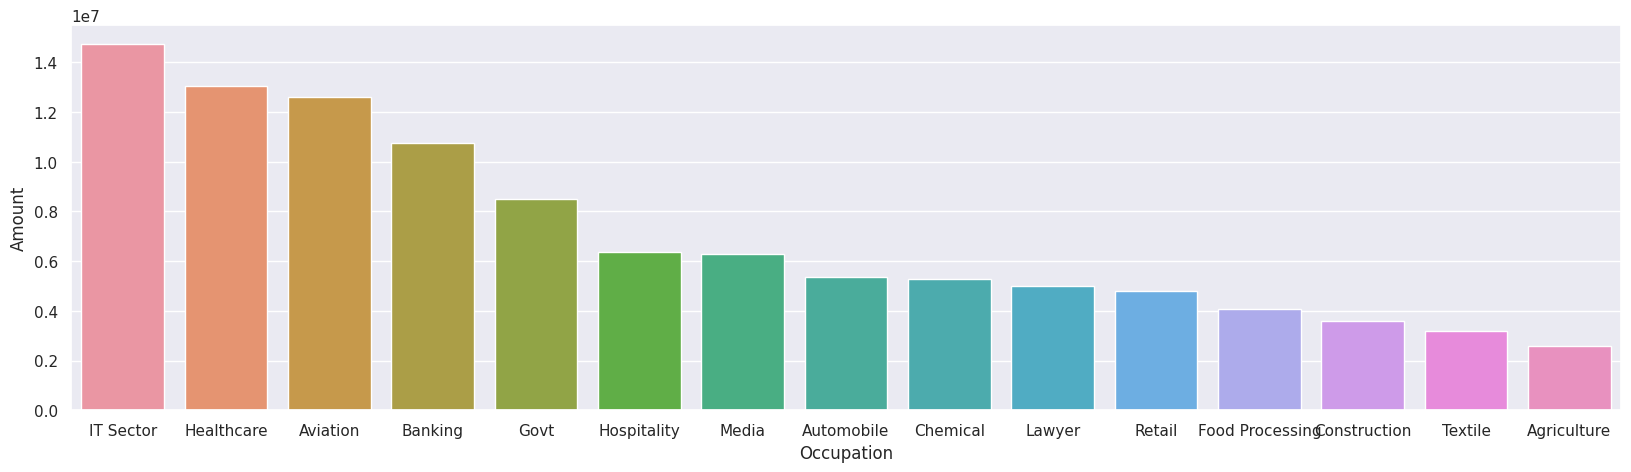

In [28]:
sales_state = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(data = sales_state, x = 'Occupation',y= 'Amount')

From above graphs we can see that most of the buyers are working in IT, Healthcare and Aviation sector.

<Axes: xlabel='Product_ID'>

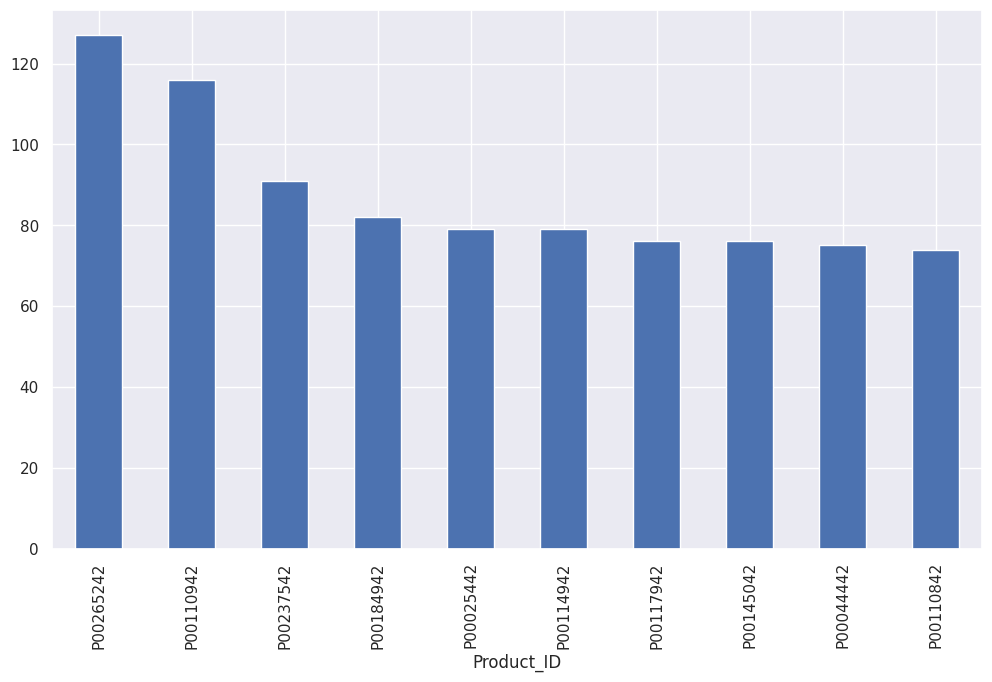

In [31]:
# top 10 most sold products (same thing as above)

fig1, ax1 = plt.subplots(figsize=(12,7))
df.groupby('Product_ID')['Orders'].sum().nlargest(10).sort_values(ascending=False).plot(kind='bar')

# Conclusion:
Married women age group 26-35 yrs from UP, Maharastra and Karnataka working in IT, Healthcare and Aviation are more likely to buy products from Food, Clothing and Electronics category.